In [1]:
import warnings
from plot_metric.functions import BinaryClassification
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5
from sklearn.model_selection import GridSearchCV, train_test_split
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [2]:
import csv
from sklearn.metrics import accuracy_score
def get_algo_path():
    import os
    cwd = os.getcwd()
    s='\\'
    if '\\' not in cwd:
        s='/'
    cwd= cwd.split(s)[4:-1]
    cwd='/'.join(cwd)
    return cwd

def get_csv_path():
    import os
    cwd = os.getcwd()
    s="\\"
    if "\\" not in cwd:
        s='/'
    file= cwd.split(s)[:4]
    file.append('models_scores.csv')
    file= s.join(file)
    return file

def line_is_exist(file, row):
    logfile = open(file, 'r')
    loglist = logfile.readlines()
    logfile.close()
    for line in loglist:
        if ','.join(row) in line:
            return True
    return False

def write_new_score(file, line):
    if( not line_is_exist(file, line) ):
        with open(file, 'a') as f:
            writer = csv.writer(f)
            writer.writerow(line)
    else:
        print('line exsist already')
    


In [3]:
data= pd.read_csv('../logis_norm.csv')
### split data en X et Y
data1= data.copy()
X= data1.drop('Loan Status', axis=1)
Y= data1['Loan Status']

X_train , X_test , Y_train , Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 123)
### ---KNN---

In [4]:
knn = KNeighborsClassifier()
params={'n_neighbors' : [2, 3, 4, 5, 6, 7, 8],
        'metric': ['minkowski','euclidean','manhattan']}

##accuracy
grid_search_acc= GridSearchCV(estimator=knn, param_grid= params, scoring='accuracy',cv=2, n_jobs=-1)
grid_search_acc= grid_search_acc.fit(X_train, Y_train)
y_predict= grid_search_acc.best_estimator_.predict(X_test)

In [5]:
## get avg precision & avg recall
report= classification_report(Y_test, y_predict, output_dict=True)
avg_list = report.pop("weighted avg")
avg_precision= round(avg_list['precision'], 3)
avg_recall= round(avg_list['recall'], 3)
accuraccy= round(accuracy_score(Y_test,y_predict), 3)
## csv row
csv_row = [get_algo_path(), 'KNN', str(grid_search_acc.best_params_), str(accuraccy), str(avg_precision), str(avg_recall)]
## write file
csv_file= get_csv_path()
write_new_score(csv_file, csv_row)


In [6]:
## evaluating the model
print("----------")
print('best parameters: ', grid_search_acc.best_params_)
print("----------")
print(confusion_matrix(Y_test,y_predict))
print("----------")
print(classification_report(Y_test, y_predict))

print("----------")

----------
best parameters:  {'metric': 'manhattan', 'n_neighbors': 3}
----------
[[11278  4081]
 [ 2216 13191]]
----------
              precision    recall  f1-score   support

           0       0.84      0.73      0.78     15359
           1       0.76      0.86      0.81     15407

    accuracy                           0.80     30766
   macro avg       0.80      0.80      0.79     30766
weighted avg       0.80      0.80      0.79     30766

----------


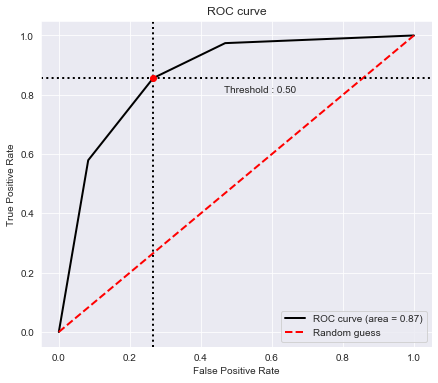

In [7]:
##ROC
y_predict_proba = grid_search_acc.best_estimator_.predict_proba(X_test)[:,1]

# Visualisation with plot_metric
bc = BinaryClassification(Y_test, y_predict_proba, labels=[1, 0])
# Figures
plt.figure(figsize=(7,6))
bc.plot_roc_curve()
plt.title('ROC curve')
plt.show()

In [8]:
grid_search_acc.cv_results_


{'mean_fit_time': array([0.17154121, 0.19547975, 0.20295954, 0.20046151, 0.19547617,
        0.20195949, 0.19647515, 0.19298267, 0.20445406, 0.19398165,
        0.19697309, 0.24833608, 0.27875447, 0.29870033, 0.28224564,
        0.24235189, 0.20244431, 0.21193385, 0.28174567, 0.20046413,
        0.24085605]),
 'std_fit_time': array([0.00498748, 0.00099742, 0.00149727, 0.0039891 , 0.00099742,
        0.00448883, 0.01097167, 0.00149751, 0.00997317, 0.00149679,
        0.0064826 , 0.05784416, 0.03041935, 0.08227968, 0.01296425,
        0.03889525, 0.01098633, 0.01346445, 0.01944876, 0.00299299,
        0.03141534]),
 'mean_score_time': array([39.57916737, 45.11286759, 48.70276856, 52.40088248, 56.61710787,
        58.93191528, 60.83233356, 40.95947504, 52.25826275, 58.67360806,
        67.00383127, 70.82411778, 73.11698604, 72.15904832, 66.24685657,
        73.05764508, 80.12225449, 89.15360403, 94.94960594, 89.19050491,
        65.96566403]),
 'std_score_time': array([1.75530767, 2.10287